In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
from keras.applications.vgg19 import VGG19
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet import MobileNet
import keras.callbacks as kcallbacks
import keras
from keras.utils import plot_model
import sklearn.metrics as metrics
from PIL import Image
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [4]:
df=pd.read_csv('/content/car-hack.csv')

In [5]:
df.head()

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,0,0,0,0,0,0,0,0,0,DoS
1,0,0,0,0,0,0,0,0,0,DoS
2,790,5,34,92,9,34,32,0,111,R
3,848,5,32,196,104,118,0,0,255,R
4,1087,1,69,96,255,107,0,0,0,gear


In [6]:
num_col = df.dtypes[df.dtypes != 'object'].index
print(df.dtypes)

CAN ID      int64
DATA[0]     int64
DATA[1]     int64
DATA[2]     int64
DATA[3]     int64
DATA[4]     int64
DATA[5]     int64
DATA[6]     int64
DATA[7]     int64
Label      object
dtype: object


In [7]:
num_col = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer() 
df[num_col] = scaler.fit_transform(df[num_col])

In [8]:
df[num_col] = df[num_col].apply(
    lambda x: (x*255))

In [9]:
df0=df[df['Label']=='R'].drop(['Label'],axis=1)
df1=df[df['Label']=='RPM'].drop(['Label'],axis=1)
df2=df[df['Label']=='gear'].drop(['Label'],axis=1)
df3=df[df['Label']=='DoS'].drop(['Label'],axis=1)
df4=df[df['Label']=='Fuzzy'].drop(['Label'],axis=1)

In [10]:

cnt=0
ims = []

img_path = "train/0/"
os.makedirs(img_path)

for i in range(0, len(df0)):  
    cnt=cnt+1
    if cnt<=27: 
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_img = Image.fromarray(array)
        new_img.save(img_path+str(i)+'.png')
        cnt=0
        ims = []

In [11]:
cnt=0
ims = []

img_path = "train/1/"
os.makedirs(img_path)

for i in range(0, len(df1)):  
    cnt=cnt+1
    if cnt<=27: 
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(img_path+str(i)+'.png')
        cnt=0
        ims = []

In [12]:
cnt=0
ims = []

img_path = "train/2/"
os.makedirs(img_path)

for i in range(0, len(df2)):  
    cnt=cnt+1
    if cnt<=27: 
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(img_path+str(i)+'.png')
        cnt=0
        ims = []

In [13]:
cnt=0
ims = []

img_path = "train/3/"
os.makedirs(img_path)


for i in range(0, len(df3)):  
    cnt=cnt+1
    if cnt<=27: 
        im=df3.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(img_path+str(i)+'.png')
        cnt=0
        ims = []

In [14]:
cnt=0
ims = []

img_path = "train/4/"
os.makedirs(img_path)


for i in range(0, len(df4)):  
    cnt=cnt+1
    if cnt<=27: 
        im=df4.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(img_path+str(i)+'.png')
        cnt=0
        ims = []

In [15]:
Directory_Train='./train/'
Directory_Test='./test/'
All_Images=[]
for subdir in os.listdir(Directory_Train):
    for filename in os.listdir(os.path.join(Directory_Train,subdir)):
        filepath=os.path.join(Directory_Train,subdir,filename)
        All_Images.append(filepath)
print(len(All_Images)) 

3722


In [16]:
Test_Size=len(All_Images)//5 	
def filemove(sourcefile,destinationfile):
    if not os.path.isfile(sourcefile):
        print ("%s not exist!"%(sourcefile))
    else:
        fpath,fname=os.path.split(destinationfile)    
        if not os.path.exists(fpath):
            os.makedirs(fpath)               
        shutil.move(sourcefile,destinationfile)          

In [17]:
# The size of test set
Test_Size

744

In [18]:
# Create the test set
val_imgs=random.sample(All_Images,Test_Size)
for img in val_imgs:
    dest_path=img.replace(Directory_Train,Directory_Test)
    filemove(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [19]:
def convert_to_244(fldr,destinaiondirectory):
    imagepaths=[]
    for root,dirs,imgs in os.walk(fldr):
        for theimage in imgs:
            theimage_path=os.path.join(root,theimage)
            imagepaths.append(theimage_path)
    for theimage_path in imagepaths:
        dir_name,filename=os.path.split(theimage_path)
        dir_name=dir_name.replace(fldr,destinaiondirectory)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(theimage_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(fldr=fldr))

In [20]:
DATA_DIR_224='./train_224/'
convert_to_244(fldr='./train/',destinaiondirectory=DATA_DIR_224)

Finish resizing


In [21]:
DATA_DIR2_224='./test_224/'
convert_to_244(fldr='./test/',destinaiondirectory=DATA_DIR2_224)

Finish resizing


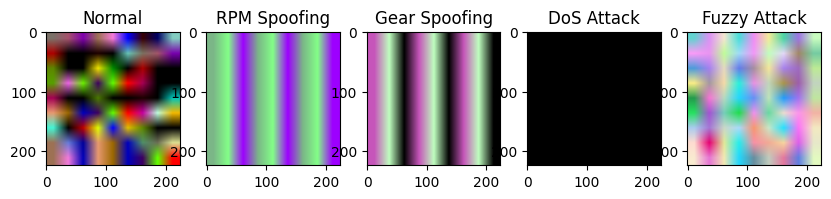

In [22]:
# Read the images for each category, the file name may vary (27.png, 83.png...)
img_1 = Image.open('./train_224/0/42.png')
img_2 = Image.open('./train_224/1/1035.png')
img_3 = Image.open('./train_224/2/951.png')
img_4 = Image.open('./train_224/3/37.png')
img_5 = Image.open('./train_224/4/450.png')

plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img_1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img_2)
plt.title("RPM Spoofing")
plt.subplot(1,5,3)
plt.imshow(img_3)
plt.title("Gear Spoofing")
plt.subplot(1,5,4)
plt.imshow(img_4)
plt.title("DoS Attack")
plt.subplot(1,5,5)
plt.imshow(img_5)
plt.title("Fuzzy Attack")
plt.show()  # display it

In [23]:
size_trgt=(224,224)
size_inpt=(224,224,3)
Size_Batch=32

#Normalization
norm_train = ImageDataGenerator(rescale=1./255)

norm_test = ImageDataGenerator(rescale=1./255)

gen_val = norm_test.flow_from_directory(
        './test_224/',
        target_size=size_trgt,
        batch_size=Size_Batch,
        class_mode='categorical')

gen_train = norm_train.flow_from_directory(
        './train_224/',
        target_size=size_trgt,
        batch_size=Size_Batch,
        class_mode='categorical')


Found 2978 images belonging to 5 classes.
Found 744 images belonging to 5 classes.


In [24]:
class Cal_Loss(keras.callbacks.Callback):
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [25]:
history= Cal_Loss()

In [26]:
def vgg19( num_class, epochs,savepath='./VGG19.h5',history=history,input_shape=size_inpt):
    model_fine_tune = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:19]:	
        layer.trainable = False
    for layer in model_fine_tune.layers[19:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='vgg')
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])	

    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_acc', patience=2, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='val_acc',
        verbose=1,
        save_best_only=True)
    hist = model.fit_generator(
        gen_train,
        steps_per_epoch=len(gen_train),
        epochs=epochs,
        validation_data=gen_val,
        validation_steps=len(gen_val),
        callbacks=[earlyStopping, saveBestModel, history],
    )
    model.save('VGG19.h5')

80134624/80134624 [==============================] - 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-26-ab9b8f0df01b>:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


24/24 [==============================] - ETA: 0s - loss: 0.2594 - accuracy: 0.9009  

24/24 [==============================] - 3067s 129s/step - loss: 0.2594 - accuracy: 0.9009 - val_loss: 1.4786e-06 - val_accuracy: 1.0000


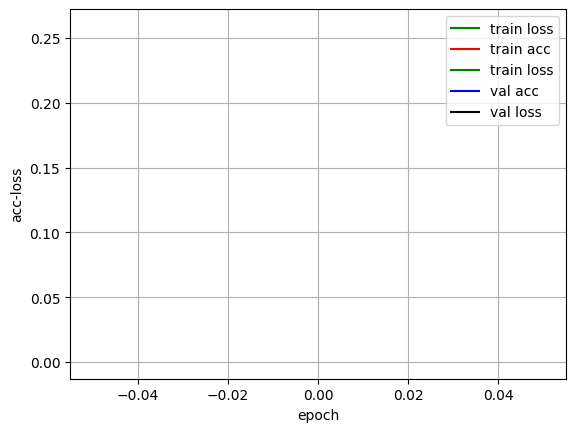

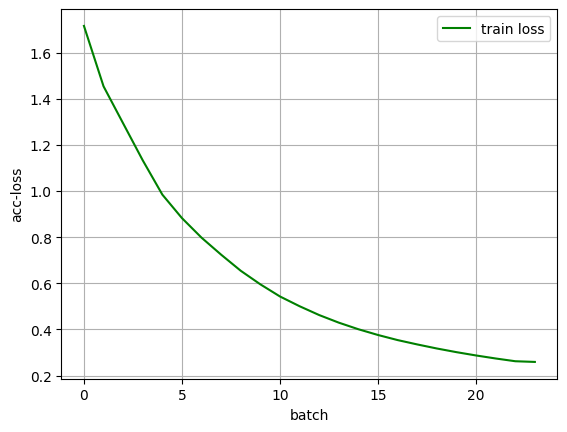

In [27]:
vgg19(num_class=5,epochs=1)
history.loss_plot('epoch')
history.loss_plot('batch')
plt.show()

In [29]:
vgg_model=load_model('./VGG19.h5')

In [40]:
root_directory = './test_224/'
labels_test = []
test_images=[]
for subdir, dirs, files in os.walk(root_directory):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        labels_test.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))
        
print(labels_test[0],test_images[0])

2 ./test_224/2/15231.png


In [41]:
label=gen_val.class_indices
label={v: k for k, v in label.items()}

In [42]:
predict=[]
len=len(test_images)
for i in range(len):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    vgg19_model=vgg_model.predict(this_img) 
    prob=vgg19_model[0,np.argmax(vgg19_model,axis=1)[0]]
    res=label[np.argmax(vgg19_model,axis=1)[0]]
    predict.append(res)
    

1/1 [==============================] - 1s 824ms/step
CPU times: user 16min 26s, sys: 4.36 s, total: 16min 30s
Wall time: 10min 24s


In [43]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy=accuracy_score(labels_test,predict)
precision=precision_score(labels_test,predict,average='weighted')
recall=recall_score(labels_test,predict,average='weighted')
f1=f1_score(labels_test,predict,average='weighted')
print('VGG19 accuracy: %s'%accuracy)
print('precision: %s'%precision)
print('recall: %s'%recall)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(labels_test, predict))
print(classification_report(labels_test, predict, target_names= ['0', '1','2','3','4']))

VGG19 accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
[[327   0   0   0   0]
 [  0 131   0   0   0]
 [  0   0 129   0   0]
 [  0   0   0  74   0]
 [  0   0   0   0  83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00       131
           2       1.00      1.00      1.00       129
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        83

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744



In [48]:
def inceptionresnet( num_class, epochs,savepath='./inceptionresnet.h5',history=history_this,input_shape=size_inpt):
    model_fine_tune = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:500]:
        layer.trainable = False
    for layer in model_fine_tune.layers[500:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='resnet')
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_acc', patience=2, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='val_acc',
        verbose=1,
        save_best_only=True)
    hist = model.fit_generator(
        gen_train,
        steps_per_epoch=len(gen_train),
        epochs=epochs,
        validation_data=gen_val,
        validation_steps=len(gen_val),
        callbacks=[earlyStopping, saveBestModel, history],
    )
    model.save('inceptionresnet.h5')

219055592/219055592 [==============================] - 7s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-48-0c6734d0322a>:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/3
24/24 [==============================] - ETA: 0s - loss: 0.1386 - accuracy: 0.9523  

24/24 [==============================] - 1736s 72s/step - loss: 0.1386 - accuracy: 0.9523 - val_loss: 40.7600 - val_accuracy: 0.4610
Epoch 2/3
24/24 [==============================] - ETA: 0s - loss: 1.8800e-04 - accuracy: 1.0000  

24/24 [==============================] - 1707s 71s/step - loss: 1.8800e-04 - accuracy: 1.0000 - val_loss: 12.0553 - val_accuracy: 0.2876
Epoch 3/3
24/24 [==============================] - ETA: 0s - loss: 4.3876e-05 - accuracy: 1.0000  

24/24 [==============================] - 1713s 72s/step - loss: 4.3876e-05 - accuracy: 1.0000 - val_loss: 0.5301 - val_accuracy: 0.7379


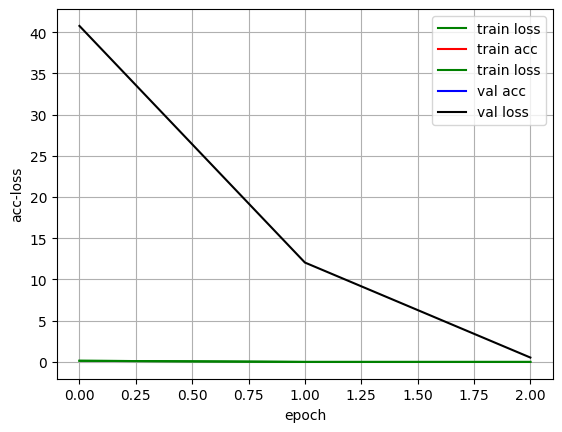

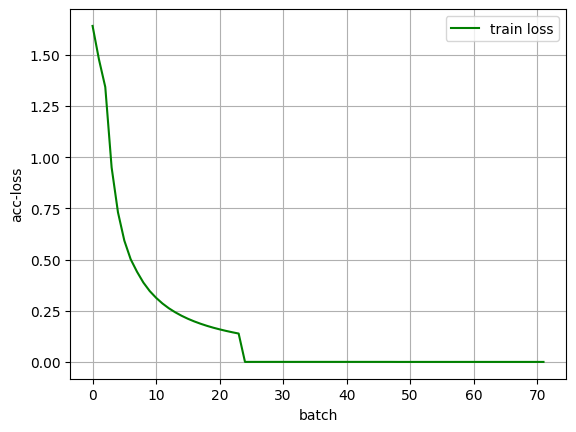

In [49]:
inceptionresnet(num_class=5,epochs=3)	# 5-class classificaiton
history.loss_plot('epoch')
history.loss_plot('batch')
plt.show()

In [50]:
inception_res_model=load_model('./inceptionresnet.h5')

In [51]:
predict=[]
len=len(test_images)
for i in range(len):
    input_img=test_images[i]
    test_batch=[]
    this_img=np.array(Image.open(input_img))/255
    test_shape=(1,)+this_img.shape
    this_img=this_img.reshape(test_shape)
    inception_res_model_batch=inception_res_model.predict(this_img)
    prob=inception_res_model_batch[0,np.argmax(inception_res_model_batch,axis=1)[0]]
    res=label[np.argmax(inception_res_model_batch,axis=1)[0]]
    predict.append(res)


1/1 [==============================] - 0s 301ms/step


In [52]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy=accuracy_score(labels_test,predict)
precision=precision_score(labels_test,predict,average='weighted')
recall=recall_score(labels_test,predict,average='weighted')
f1=f1_score(labels_test,predict,average='weighted')
print('inceptionresnet accuracy: %s'%accuracy)
print('precision: %s'%precision)
print('recall: %s'%recall)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(labels_test, predict))
print(classification_report(labels_test, predict, target_names=['0', '1','2','3','4']))

inceptionresnet accuracy: 0.7379032258064516
precision: 0.9116976734592854
recall: 0.7379032258064516
f1: 0.7544078204921517
[[135   0   0   0 192]
 [  0 131   0   0   0]
 [  0   0 129   0   0]
 [  0   0   0  74   0]
 [  3   0   0   0  80]]
              precision    recall  f1-score   support

           0       0.98      0.41      0.58       327
           1       1.00      1.00      1.00       131
           2       1.00      1.00      1.00       129
           3       1.00      1.00      1.00        74
           4       0.29      0.96      0.45        83

    accuracy                           0.74       744
   macro avg       0.85      0.88      0.81       744
weighted avg       0.91      0.74      0.75       744



In [32]:
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout,Average
from keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [33]:
img=Input(shape=(224,224,3),name='img')
feature1=inception_res_model(img)
feature2=vgg_model(img)
for layer in inception_res_model.layers:  
    layer.trainable = False 
for layer in vgg_model.layers:  
    layer.trainable = False  
output=Average()([feature1,feature2])
model=Model(inputs=img,outputs=output)

opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [37]:
predict=[]
length=len(test_images)
for i in range((length//127)+1):
    input_img=test_images[127*i:127*(i+1)]
    test_batch=[]
    for path in input_img:
        thisimg=np.array(Image.open(path))/255
        test_batch.append(thisimg)
    model_batch=model.predict(np.array(test_batch))
    predict_batch=list(np.argmax(model_batch,axis=1))
    predict_batch=[label[con] for con in predict_batch]
    predict.append(predict_batch)

predict=sum(predict,[])

4/4 [==============================] - 109s 26s/step


In [38]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(labels_test,predict)
print('Probability Averaging accuracy:%s'%acc)

Probability Averaging accuracy:1.0


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(labels_test, predict))
target_names = ['0', '1','2','3','4']
print(classification_report(labels_test, predict, target_names=target_names))

[[327   0   0   0   0]
 [  0 131   0   0   0]
 [  0   0 129   0   0]
 [  0   0   0  74   0]
 [  0   0   0   0  83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00       131
           2       1.00      1.00      1.00       129
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        83

    accuracy                           1.00       744
   macro avg       1.00      1.00      1.00       744
weighted avg       1.00      1.00      1.00       744

